In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Iteration 0: m = 0.1775, b = 0.0052, cost = 1487.5000
Iteration 100: m = 1.6623, b = 0.0643, cost = 10.5330
Iteration 200: m = 1.6618, b = 0.0816, cost = 10.5030
Iteration 300: m = 1.6613, b = 0.0989, cost = 10.4730
Iteration 400: m = 1.6608, b = 0.1162, cost = 10.4432
Iteration 500: m = 1.6604, b = 0.1334, cost = 10.4134
Iteration 600: m = 1.6599, b = 0.1506, cost = 10.3838
Iteration 700: m = 1.6594, b = 0.1678, cost = 10.3542
Iteration 800: m = 1.6589, b = 0.1850, cost = 10.3248
Iteration 900: m = 1.6584, b = 0.2021, cost = 10.2954

Final parameters: m = 1.66, b = 0.22
Line equation: y = 1.66x + 0.22
To get a profit of 100K, you need approximately 60.18K investment
You get approximately 99.70K profit for 60K investment


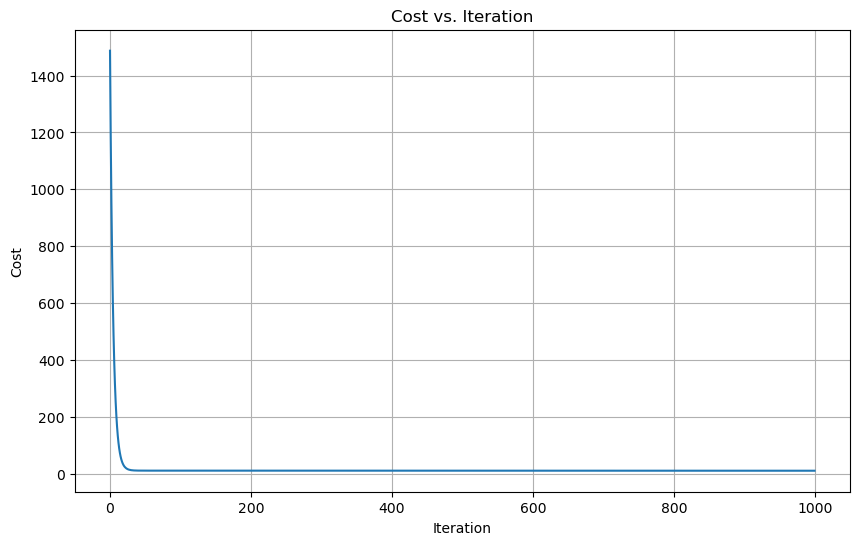

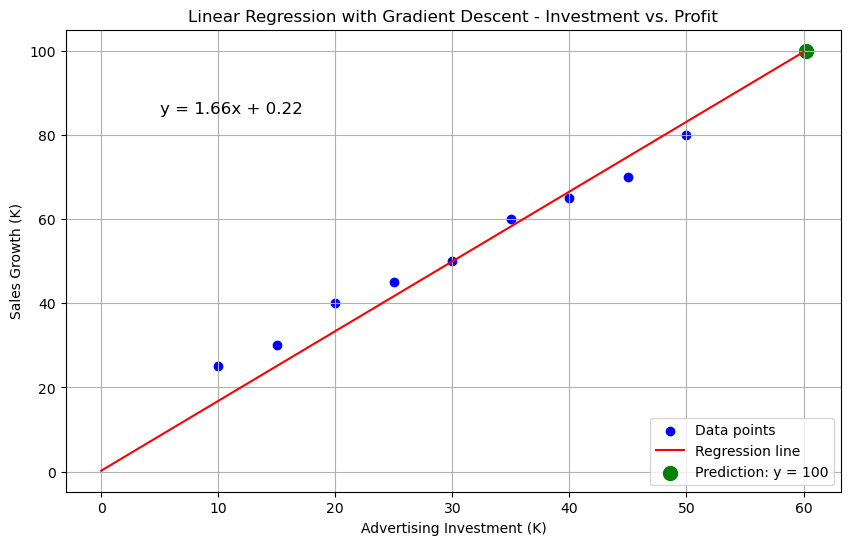

In [2]:
# Our data
advertising_investment = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50])  # shape: (n,)
sales_growth = np.array([25, 30, 40, 45, 50, 60, 65, 70, 80])  # shape: (n,)

# Parameters
learning_rate = 0.0001 # נתן לי OVERFLOW אז הורדתי את הa מ0.01
iterations = 1000

# Initialize parameters
m = 0
b = 0

# Number of training examples
n = len(advertising_investment)

# Lists to store cost history for visualization
cost_history = []

# Gradient Descent algorithm
for i in range(iterations):
    y_pred = m * advertising_investment + b
    cost = (1/(2*n)) * np.sum((y_pred - sales_growth)**2)
    cost_history.append(cost)
    
    # Gradients
    m_gradient = (1/n) * np.sum((y_pred - sales_growth) * advertising_investment)
    b_gradient = (1/n) * np.sum(y_pred - sales_growth)
    
    # Update parameters
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient
    
    if i % 100 == 0:
        print(f"Iteration {i}: m = {m:.4f}, b = {b:.4f}, cost = {cost:.4f}")

# Final results
print(f"\nFinal parameters: m = {m:.2f}, b = {b:.2f}")
print(f"Line equation: y = {m:.2f}x + {b:.2f}")

# Prediction 1: How much investment is needed for 100K profit?
sales_growth_predict = 100
investment_needed = (sales_growth_predict - b) / m
print(f"To get a profit of 100K, you need approximately {investment_needed:.2f}K investment")

# Prediction 2: What is the expected profit for 60K investment?
investment_to_predict = 60
sales_prediction = m * investment_to_predict + b
print(f"You get approximately {sales_prediction:.2f}K profit for 60K investment")

# Plot 1: Cost vs. Iteration
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Plot 2: Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(advertising_investment, sales_growth, color='blue', label='Data points')

# Use linspace from 0 to 60 to show a wider range
x_line = np.linspace(0, 60, 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label='Regression line')

# Add prediction point (for y = 100)
plt.scatter([[investment_needed]], [100], color='green', s=100, label='Prediction: y = 100')

# Add labels
plt.title('Linear Regression with Gradient Descent - Investment vs. Profit')
plt.xlabel('Advertising Investment (K)')
plt.ylabel('Sales Growth (K)')
plt.grid(True)
plt.legend()

# Display equation on the graph
plt.text(5, max(sales_growth) + 5, f"y = {m:.2f}x + {b:.2f}", fontsize=12)

plt.show()


In [30]:
X = np.array([
    [2, 15, 40, 0],
    [5, 16, 45, 1],
    [3, 16, 40, 0],
    [10, 18, 50, 5],
    [7, 17, 45, 3],
    [1, 14, 35, 0],
    [8, 16, 45, 4],
    [4, 15, 40, 1],
    [6, 15, 42, 2],
    [12, 19, 55, 8]
])
y = np.array([15, 25, 18, 45, 35, 12, 38, 22, 30, 60])  # Monthly salary in thousands of NIS

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the results
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Coefficients (β₁, β₂, β₃, β₄): {coefficients}")
print(f"β₄ (Managerial Experience) has the highest impact per unit increase, with a value of {coefficients[3]:.2f}.")
# Generate the regression equation
equation = f"y = {intercept:.2f} + ({coefficients[0]:.2f})*x₁ + ({coefficients[1]:.2f})*x₂ + ({coefficients[2]:.2f})*x₃ + ({coefficients[3]:.2f})*x₄"
print(f"Linear Regression Equation: {equation}")

# Prediction for a new employee
new_employee = np.array([[6, 16, 43, 2]])
predicted_salary = model.predict(new_employee)
print(f"Predicted monthly salary for [6, 16, 43, 2]: {predicted_salary[0]:.2f}K NIS")

# calculate R^2 1- (SSE/SST)
y_pred = model.predict(X)
sse = np.sum((y - y_pred) ** 2)
sst = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (sse / sst)
print(f"R² = {r_squared:.4f}")


Intercept (β₀): 1.72
Coefficients (β₁, β₂, β₃, β₄): [1.97320904 0.11806371 0.20019818 2.57642763]
β₄ (Managerial Experience) has the highest impact per unit increase, with a value of 2.58.
Linear Regression Equation: y = 1.72 + (1.97)*x₁ + (0.12)*x₂ + (0.20)*x₃ + (2.58)*x₄
Predicted monthly salary for [6, 16, 43, 2]: 29.21K NIS
R² = 0.9972
